In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import MinMaxScaler
import plotly.plotly as py
import plotly.tools as tls

In [0]:
tls.set_credentials_file(username="franklinsierrajer", api_key="mpznaSNAFRoC7K9BLMwa")

## Conjunto de todas las imagenes promedio

In [23]:
path_classes = "/content/drive/My Drive/Polyps (1)/Experimentos/Polipos/notebooks/mix_avg_img/"
classes_names = os.listdir(path_classes)
classes_names = np.sort(classes_names)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['adenomaNbi' 'adenomaWl' 'hyperplasNbi' 'hyperplasWl' 'serratedNbi'
 'serratedWl']
class:  adenomaNbi total  40
class:  adenomaWl total  40
class:  hyperplasNbi total  21
class:  hyperplasWl total  21
class:  serratedNbi total  15
class:  serratedWl total  15


In [24]:
x1 = []
y1 = []
resize_value = 100
for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, " target: ", (i+1), " total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        x1.append(flatt_img)
        y1.append(i+1)
x1 = np.r_[x1]        
y1 = np.r_[y1]

1 clase:  adenomaNbi  target:  1  total:  40
2 clase:  adenomaWl  target:  2  total:  40
3 clase:  hyperplasNbi  target:  3  total:  21
4 clase:  hyperplasWl  target:  4  total:  21
5 clase:  serratedNbi  target:  5  total:  15
6 clase:  serratedWl  target:  6  total:  15


In [25]:
x1.shape

(152, 10000)

In [26]:
x1 = StandardScaler().fit_transform(x1)
x1

array([[ 2.35555517,  2.35555517,  2.35555517, ...,  2.40471646,
         2.3721131 ,  2.3721131 ],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       ...,
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915],
       [-0.25156414, -0.25156414, -0.25156414, ..., -0.2375744 ,
        -0.24064915, -0.24064915]])

## Conjunto de todas las imagenes varianza

In [27]:
path_classes = "/content/drive/My Drive/Polyps (1)/Experimentos/Polipos/notebooks/mix_var_img/"
classes_names = os.listdir(path_classes)
classes_names = np.sort(classes_names)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['adenomaNbi' 'adenomaWl' 'hiperplasNbi' 'hiperplasWl' 'serratedNbi'
 'serratedWl']
class:  adenomaNbi total  40
class:  adenomaWl total  40
class:  hiperplasNbi total  21
class:  hiperplasWl total  21
class:  serratedNbi total  15
class:  serratedWl total  15


In [28]:
x2 = []
y2 = []
resize_value = 100
for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, " target: ", (i+1), " total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        x2.append(flatt_img)
        y2.append(i+1)
x2 = np.r_[x2]        
y2 = np.r_[y2]

1 clase:  adenomaNbi  target:  1  total:  40
2 clase:  adenomaWl  target:  2  total:  40
3 clase:  hiperplasNbi  target:  3  total:  21
4 clase:  hiperplasWl  target:  4  total:  21
5 clase:  serratedNbi  target:  5  total:  15
6 clase:  serratedWl  target:  6  total:  15


In [29]:
x2.shape

(152, 10000)

In [0]:
x2 = StandardScaler().fit_transform(x2)

## Conjunto de todas las imagenes derivadas

In [31]:
path_classes = "/content/drive/My Drive/Polyps (1)/Experimentos/Polipos/notebooks/mix_der_img/"
classes_names = os.listdir(path_classes)
classes_names = np.sort(classes_names)
print (classes_names)
dic_img ={}

for i, name_class in enumerate(classes_names):
    dic_img[classes_names[i]] = np.array(os.listdir(path_classes+classes_names[i]))
    print ("class: ", name_class, "total ", len(dic_img[classes_names[i]]))

['adenomaNbi' 'adenomaWl' 'hiperplasNbi' 'hiperplasWl' 'serratedNbi'
 'serratedWl']
class:  adenomaNbi total  40
class:  adenomaWl total  40
class:  hiperplasNbi total  21
class:  hiperplasWl total  21
class:  serratedNbi total  15
class:  serratedWl total  15


In [32]:
x3 = []
y3 = []
resize_value = 100
for i, classes in enumerate(classes_names):
    print((i+1), "clase: ", classes, " target: ", (i+1), " total: ", len(dic_img[classes]))
    for img_name in dic_img[classes]:
        path_image = path_classes+classes+'/'+img_name
        img = cv.resize(cv.imread(path_image,0),(100,100))*1.
        flatt_img = img.reshape(resize_value*resize_value)
        x3.append(flatt_img)
        y3.append(i+1)
x3 = np.r_[x3]        
y3 = np.r_[y3]

1 clase:  adenomaNbi  target:  1  total:  40
2 clase:  adenomaWl  target:  2  total:  40
3 clase:  hiperplasNbi  target:  3  total:  21
4 clase:  hiperplasWl  target:  4  total:  21
5 clase:  serratedNbi  target:  5  total:  15
6 clase:  serratedWl  target:  6  total:  15


In [0]:
x3 = StandardScaler().fit_transform(x3)

# Juntando todo

Analisis del discriminante lineal

Estandarizar los datos

* Obtener los valores y vectores propios de la matriz de covarianza o de correlaciones o la tecnica del singular vector descompostion.
* Ordenar los valores propios de manera descente y quedar con los p mayores para disminuir el numero de variables
* Constriuir la matriz de proyeccion W a partir de los p valores propios







In [0]:
img_mix = np.concatenate((x1, x2, x3), axis = 1)

In [35]:
img_mix.shape

(152, 30000)

##Calculo la descomposición de los valores y vectores propios

**Valores propios:**  Determinan la magnitud (varianza de datos)

**Vectores propios:** Determinan las direcciones en el nuevo espacio vectorial

####Usando la matriz de covarianza

In [0]:
mat_cov = np.cov(img_mix)

In [37]:
eig_vals, eig_vectors = np.linalg.eig(mat_cov)
print("Valores propios \n%s" %eig_vals)
print("Vectores propios \n%s" %eig_vectors)

Valores propios 
[12.80440416 11.06148026  9.84619021  7.97000504  7.1642055   6.29644486
  5.4857812   4.97403877  4.19857398  3.20149768  3.0567039   2.62122563
  2.37280972  2.21217399  1.93531249  1.76831306  1.70194831  1.55862678
  1.53738632  1.47560005  1.32492895  1.17791405  1.16573066  1.08306845
  1.02191096  1.00176801  0.9660245   0.91855155  0.88901979  0.86663511
  0.81614656  0.78698727  0.76828713  0.72211795  0.70031332  0.69679514
  0.68568524  0.675813    0.65376673  0.56799642  0.62920214  0.59841653
  0.61286339  0.55522017  0.54350031  0.52660053  0.51370607  0.47567589
  0.49669801  0.48821274  0.44143271  0.43081747  0.42576631  0.39404593
  0.40970437  0.40457302  0.37960797  0.37094227  0.36852318  0.3565105
  0.35265373  0.33905383  0.333771    0.32744281  0.31709342  0.29838346
  0.3008097   0.          0.29185366  0.29410864  0.27900653  0.27445691
  0.26342872  0.2692821   0.24571753  0.26094886  0.25801773  0.25502559
  0.24722361  0.24003392  0.2334944

####Usando la matriz de correlaciones

Normalizacion de la matriz de covarianza.

In [38]:
mat_corr = np.corrcoef(img_mix)
mat_corr

array([[ 1.        , -0.14018994, -0.18393524, ..., -0.2328545 ,
        -0.06795439, -0.14575289],
       [-0.14018994,  1.        ,  0.45971896, ...,  0.1480684 ,
         0.04205711,  0.01995273],
       [-0.18393524,  0.45971896,  1.        , ..., -0.06066143,
         0.10033741, -0.14571561],
       ...,
       [-0.2328545 ,  0.1480684 , -0.06066143, ...,  1.        ,
         0.2052187 ,  0.13241624],
       [-0.06795439,  0.04205711,  0.10033741, ...,  0.2052187 ,
         1.        ,  0.14981642],
       [-0.14575289,  0.01995273, -0.14571561, ...,  0.13241624,
         0.14981642,  1.        ]])

In [0]:
eig_vals, eig_vectors = np.linalg.eig(mat_corr)

##Las componenetes principales

In [0]:
scaler = MinMaxScaler(feature_range=[0,1])

In [0]:
data_rescaled = scaler.fit_transform(img_mix)

In [0]:
pca = pca().fit(data_rescaled)

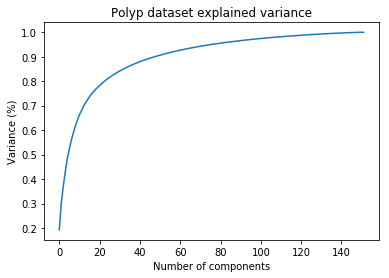

In [78]:
#dibujo la suma de la varianza acumulativa
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance (%)') #for each component
plt.title('Polyp dataset explained variance')
plt.show()

### Otro enfoque

In [0]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vectors[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

In [80]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
17.565906746267373
12.126867172304198
9.725367101249017
8.552643323151084
7.259918523379769
5.846184836077637
5.6153281437304825
5.125340149824022
3.95017064976915
3.373007453114776
2.9592194680242296
2.714784159598074
2.4776391973306904
2.2716513342232676
2.0606813361283267
1.9298506679509695
1.8253091103115038
1.7024037746228287
1.611796353577087
1.5000113656155205
1.4423717800644065
1.406677402999576
1.3352375736855648
1.2489949314115572
1.1913483089694445
1.1470140864777956
1.1134125723150643
1.0752918617971219
1.0112314674242535
0.9999202488816605
0.9704838894770688
0.9258657154005066
0.8987387183503043
0.8743748003305156
0.826455750430198
0.804381321392931
0.772059723929425
0.7649409029163414
0.7423621198123533
0.7095821204524186
0.6929377677660798
0.6809502802322058
0.6417467078539262
0.6210341807370112
0.6086444608184096
0.5881978220242473
0.577829696907594
0.5628293998181438
0.5539425161378023
0.5346053512705793
0.5240738607570444
0.51931470172

In [81]:
len(eig_pairs)

152

In [0]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [83]:
trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,len(img_mix))],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,len(img_mix))], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~franklinsierrajer/0 or inside your plot.ly account where it is named 'selecting-principal-components'


In [88]:
acp = pca(n_components = 74)
img_mix = acp.fit_transform(img_mix)
img_mix

array([[ 38.03728121, -29.04770691,  45.82229855, ...,  -6.8211811 ,
        -12.67126402,   4.64054159],
       [ 69.97737338, -29.56953702,   9.30047669, ...,  17.6575753 ,
        -18.76832101, -19.01103495],
       [118.20773964, -85.17260307,  54.29407433, ...,  -0.21615263,
          5.4064086 ,   6.77997508],
       ...,
       [ 86.8138036 ,  51.28742556, -27.02443466, ...,  -1.80671234,
         -3.6950698 ,   1.69434607],
       [116.8247969 ,  61.61964577, -29.50054777, ...,  -6.78984519,
         -1.75137046,  -7.03749637],
       [133.37987914,  85.83661821, -37.74341939, ...,  -1.05324104,
          0.66107085,  -4.17879098]])

In [89]:
img_mix.shape

(152, 74)